# Importing Libraries

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Data Reading And Analysing the Dataset

In [199]:
pd.set_option('display.max_columns', None)
df=pd.read_csv(r"C:\Users\Avinash\Desktop\Projects\EvaluationProjects\5_GlobalPowerPlant\globalpowerplant.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [200]:
df.shape

(908, 25)

In [201]:
df.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Now from the observation we can delete country,country_long,other_fuel2,other_fuel3,wepp_id,year_of_capacity_data,generation_data_source,estimated_generation_gwh also deleting url,name,gppd_idnr also does not give any information as all of them are different.

In [202]:
df=df.drop(columns={'country','country_long','other_fuel2','other_fuel3','wepp_id','year_of_capacity_data','generation_data_source','estimated_generation_gwh','url','name','gppd_idnr'},axis=1)

In [203]:
df.nunique()

capacity_mw            365
latitude               837
longitude              828
primary_fuel             8
other_fuel1              3
commissioning_year      73
owner                  280
source                 191
geolocation_source       3
generation_gwh_2013    364
generation_gwh_2014    374
generation_gwh_2015    398
generation_gwh_2016    405
generation_gwh_2017    410
dtype: int64

In [204]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
owner                  566
source                   0
geolocation_source      19
generation_gwh_2013    524
generation_gwh_2014    507
generation_gwh_2015    483
generation_gwh_2016    471
generation_gwh_2017    465
dtype: int64

# Encoding

In [205]:
from sklearn.preprocessing import LabelEncoder

In [206]:
objList = df.select_dtypes(include = "object").columns

In [207]:
le = LabelEncoder()

for i in objList:
    df[i] = le.fit_transform(df[i].astype(str))

# Filling the empty blocks in dataframe

In [208]:
df["latitude"].fillna(df["latitude"].mean(),inplace=True)

In [209]:
df["longitude"].fillna(df["longitude"].mean(),inplace=True)

In [210]:
df["other_fuel1"].fillna(df["other_fuel1"].mode(),inplace=True)

In [211]:
df["commissioning_year"].fillna(df["commissioning_year"].mean(),inplace=True)

In [212]:
df["generation_gwh_2013"].fillna(df["generation_gwh_2013"].mean(),inplace=True)

In [213]:
df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].mean(),inplace=True)

In [214]:
df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].mean(),inplace=True)

In [215]:
df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].mean(),inplace=True)

In [216]:
df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].mean(),inplace=True)

# Seperating primary_fuel

In [217]:
dfS=df[['primary_fuel']]

In [218]:
df.drop(columns={'primary_fuel'},inplace=True)

# Scaling the data

In [219]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [220]:
df

,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0.000525,0.755851,0.171728,1.000000,0.923077,0.817857,0.573684,0.333333,0.083522,0.086052,0.079049,0.081757,0.072097
1,0.020588,0.626788,0.222854,1.000000,0.767878,0.921429,0.915789,0.666667,0.083522,0.086052,0.079049,0.081757,0.072097
2,0.008235,0.518688,0.027220,1.000000,0.767878,0.007143,0.110526,0.666667,0.083522,0.086052,0.079049,0.081757,0.072097
3,0.028361,0.592985,0.848756,1.000000,0.846154,1.000000,0.115789,0.666667,0.022902,0.021964,0.027629,0.029519,0.018902
4,0.378151,0.520821,0.514301,0.666667,0.967033,1.000000,0.115789,0.666667,0.060476,0.107923,0.193732,0.207996,0.153365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0.336134,0.306872,0.325524,0.666667,0.978022,1.000000,0.115789,0.666667,0.083522,0.086052,0.000033,0.007783,0.024644
904,0.000630,0.178409,0.355737,1.000000,0.767878,0.407143,0.405263,0.000000,0.083522,0.086052,0.079049,0.081757,0.072097
905,0.005357,0.268386,0.259176,1.000000,0.767878,1.000000,0.110526,0.666667,0.083522,0.086052,0.079049,0.081757,0.072097
906,0.016807,0.611066,0.190672,1.000000,0.767878,0.325000,0.310526,0.666667,0.083522,0.086052,0.079049,0.081757,0.072097


# Adding primary fuel column again

In [221]:
frames = [df, dfS]

df = pd.concat(frames,axis=1)

In [222]:
df

,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,primary_fuel
0,0.000525,0.755851,0.171728,1.000000,0.923077,0.817857,0.573684,0.333333,0.083522,0.086052,0.079049,0.081757,0.072097,6
1,0.020588,0.626788,0.222854,1.000000,0.767878,0.921429,0.915789,0.666667,0.083522,0.086052,0.079049,0.081757,0.072097,1
2,0.008235,0.518688,0.027220,1.000000,0.767878,0.007143,0.110526,0.666667,0.083522,0.086052,0.079049,0.081757,0.072097,7
3,0.028361,0.592985,0.848756,1.000000,0.846154,1.000000,0.115789,0.666667,0.022902,0.021964,0.027629,0.029519,0.018902,2
4,0.378151,0.520821,0.514301,0.666667,0.967033,1.000000,0.115789,0.666667,0.060476,0.107923,0.193732,0.207996,0.153365,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0.336134,0.306872,0.325524,0.666667,0.978022,1.000000,0.115789,0.666667,0.083522,0.086052,0.000033,0.007783,0.024644,1
904,0.000630,0.178409,0.355737,1.000000,0.767878,0.407143,0.405263,0.000000,0.083522,0.086052,0.079049,0.081757,0.072097,6
905,0.005357,0.268386,0.259176,1.000000,0.767878,1.000000,0.110526,0.666667,0.083522,0.086052,0.079049,0.081757,0.072097,7
906,0.016807,0.611066,0.190672,1.000000,0.767878,0.325000,0.310526,0.666667,0.083522,0.086052,0.079049,0.081757,0.072097,1


# EDA

## Uni_Variant Analysis

### Distplot

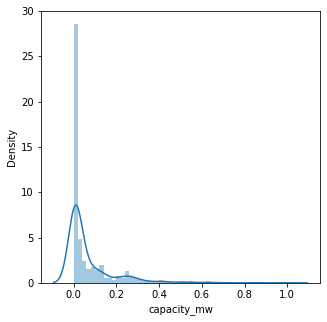

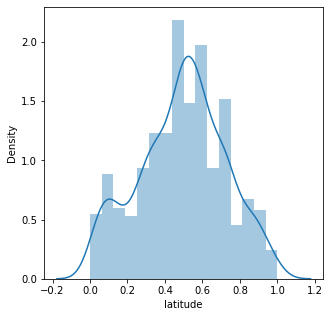

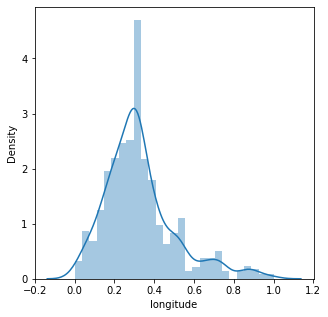

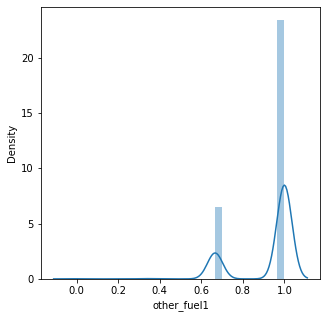

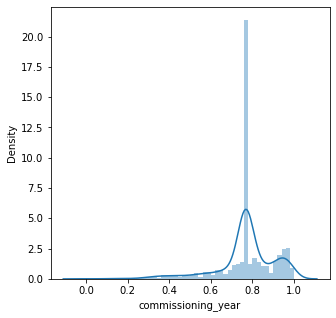

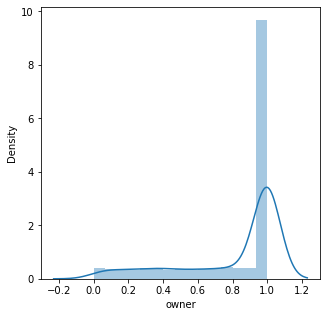

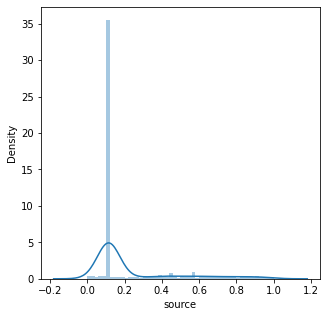

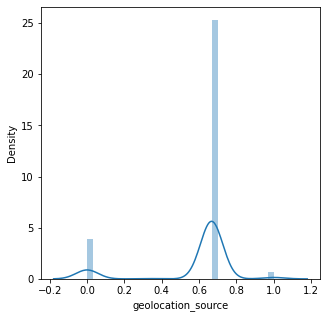

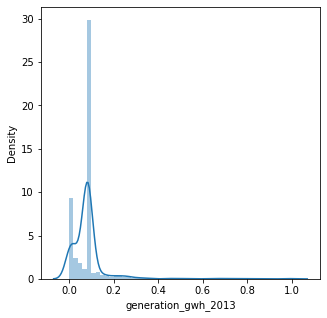

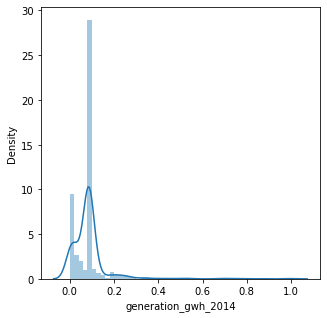

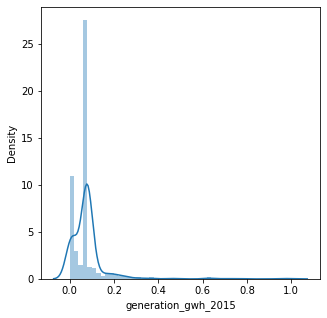

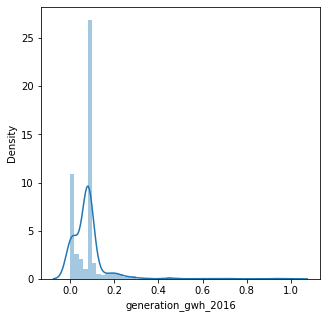

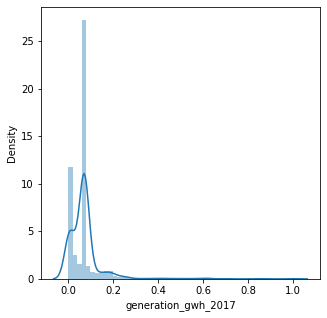

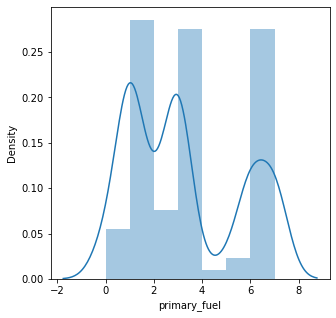

In [125]:
for column in df:
        plt.figure(figsize=(5,5))
        sn.distplot(df[column])

Some Skewness is present in various columns which we will handle later.

### Boxplot

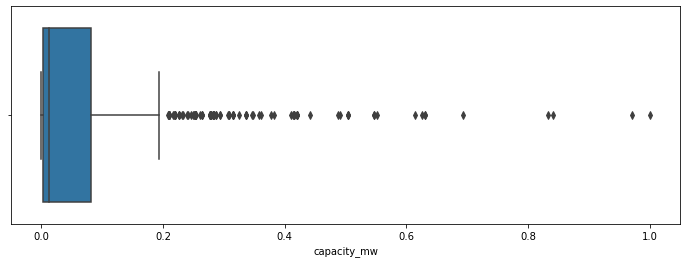

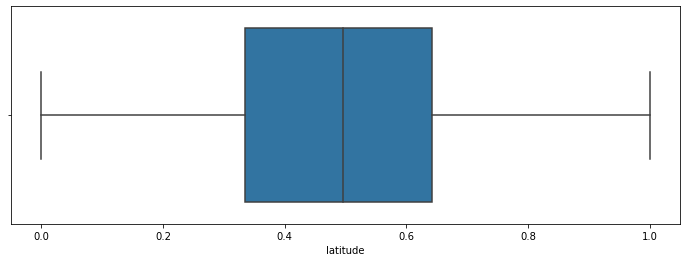

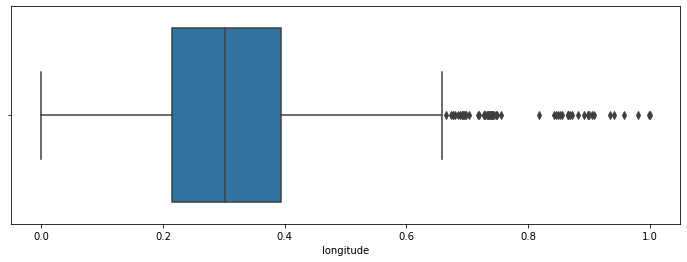

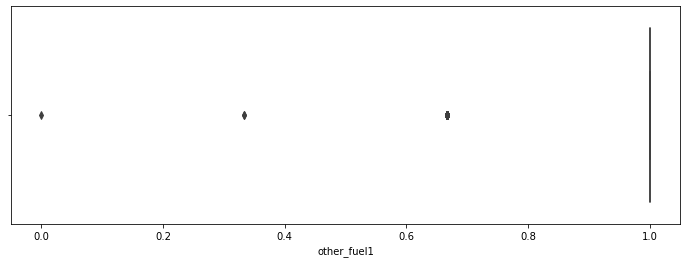

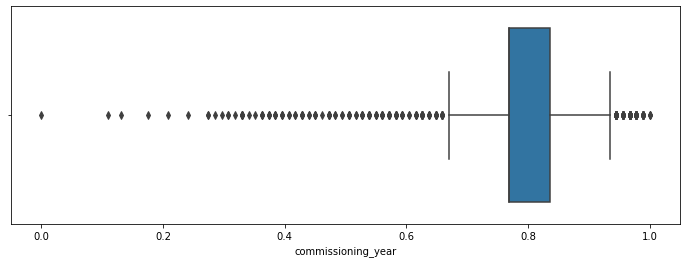

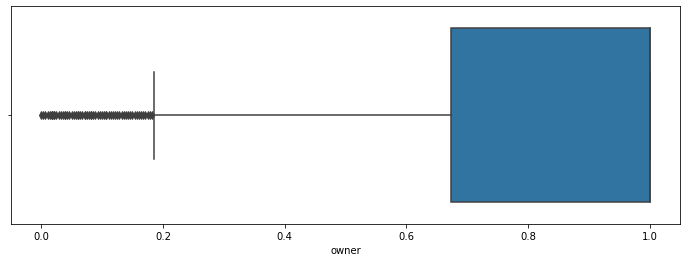

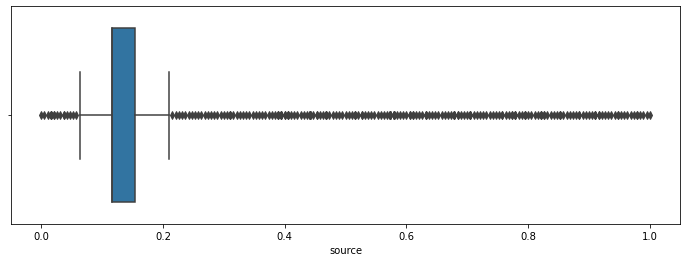

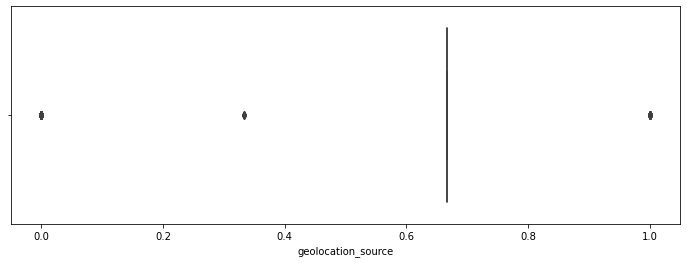

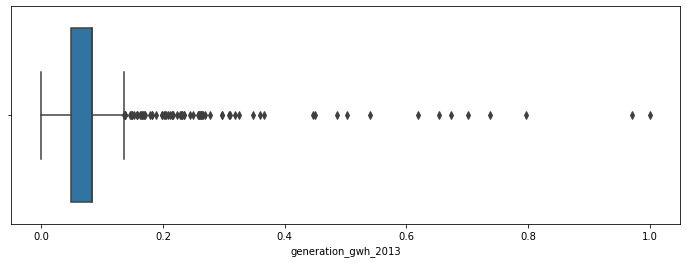

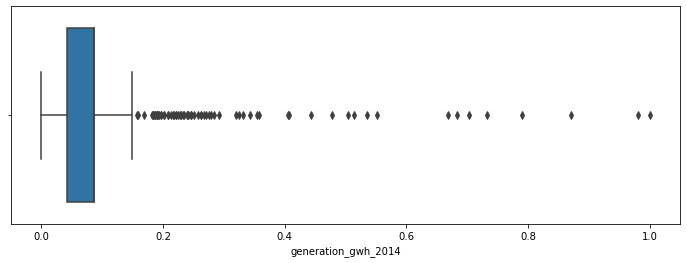

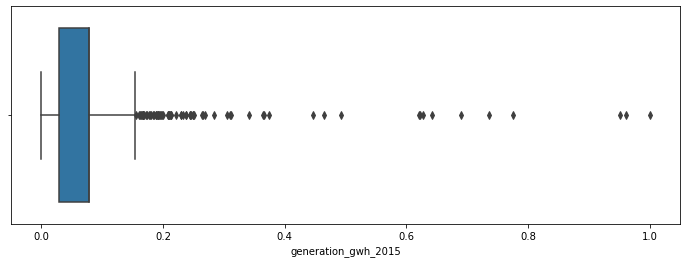

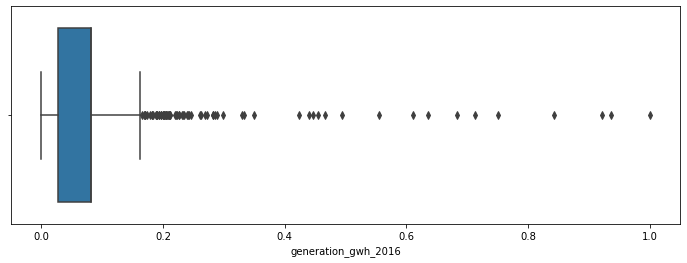

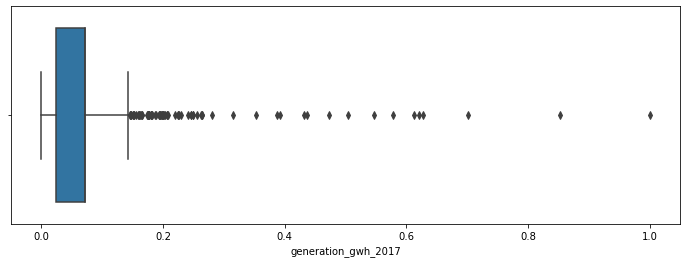

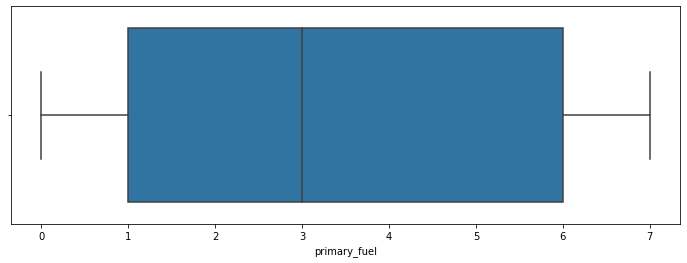

In [126]:
for column in df:
        plt.figure(figsize=(12,4))
        sn.boxplot(x=column,data=df)

Some columns have a high amount of outliers in them

### Pairplot

##### 1:capacity_mw

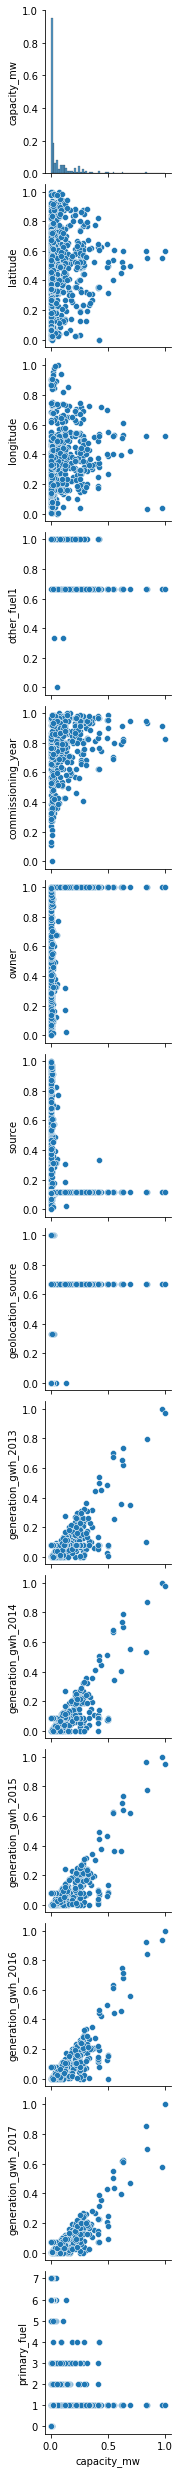

In [137]:
p=sn.pairplot(data=df,
            x_vars=['capacity_mw'],
            y_vars=df.columns)

generation_growth for every year is linear and commmitioing_year is logrithemic progression. 

#### 2:primary_fuel

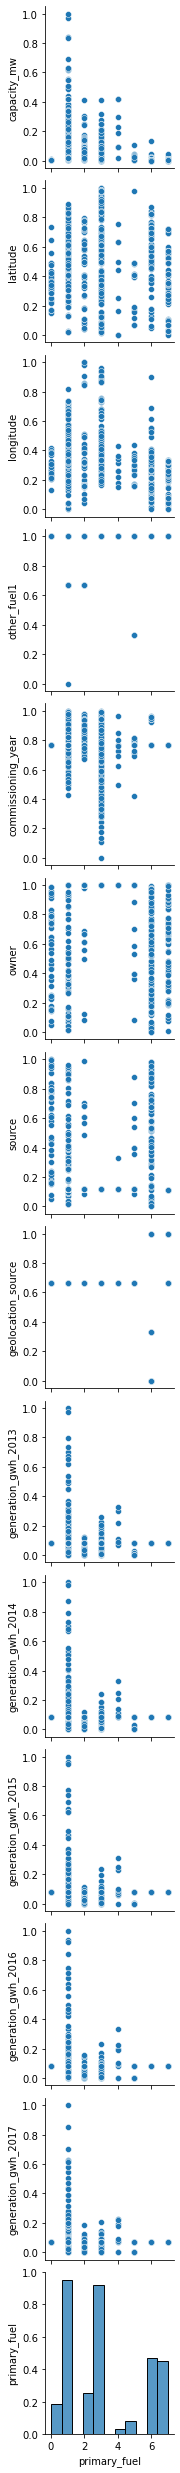

In [143]:
p=sn.pairplot(data=df,
            x_vars=['primary_fuel'],
            y_vars=df.columns)

#### Finding out classes in primary_fuel is equal or not

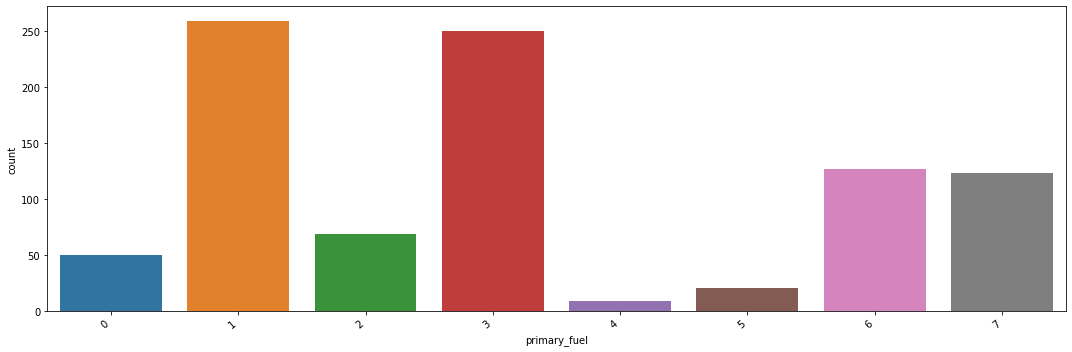

In [145]:
plt.figure(figsize=(15,5))
ax=sn.countplot(df["primary_fuel"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

1 nad 3 has the most number of classes so we have to equate all the classes.

### Heatmap

<AxesSubplot:>

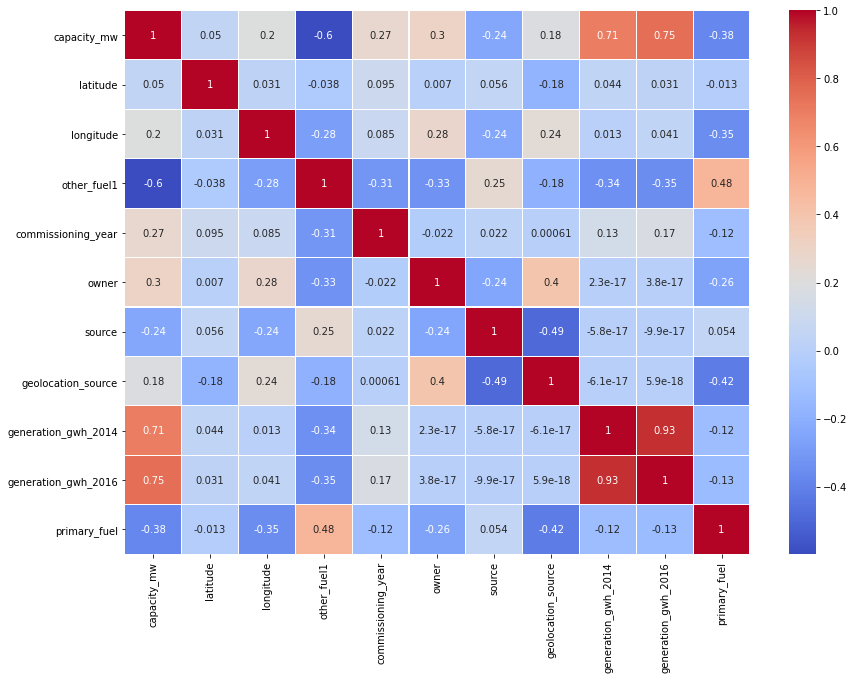

In [149]:
plt.figure(figsize=(14,10))
sn.heatmap(df.corr(),linewidths=.1,cmap="coolwarm", annot=True)

Deleting generation_growth_2013,generation_growth_2015,generation_growth_2017 as they are highly corelated to each other.

In [223]:
df=df.drop(columns={'generation_gwh_2013','generation_gwh_2015','generation_gwh_2017'},axis=1)

### Removing Outliers

In [224]:
from scipy.stats import zscore

In [225]:
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]

In [226]:
df.shape

(833, 11)

only 8 percent data is lost

### Skewness Removal

In [227]:
df.skew()

capacity_mw            1.948273
latitude              -0.112245
longitude              0.851454
other_fuel1           -1.434853
commissioning_year    -0.849483
owner                 -1.249931
source                 1.782665
geolocation_source    -1.854449
generation_gwh_2014    1.539467
generation_gwh_2016    1.425082
primary_fuel           0.416954
dtype: float64

#### capacity_mw

In [228]:
cm=np.sqrt(df["capacity_mw"])
cm.skew()

1.1340124454237939

In [229]:
df["capacity_mw"]=cm

#### longitude

In [230]:
l=np.sqrt(df["longitude"])
l.skew()

-0.1666565038143385

In [231]:
df["longitude"]=l

#### other_fuel1

In [232]:
from scipy.stats import boxcox

In [245]:
o=boxcox(df["other_fuel1"]+1)[0]
pd.Series(o).skew()

-1.434853453094484

#### commissioning_year

In [234]:
c=boxcox(df["commissioning_year"])[0]
pd.Series(c).skew()

0.025238637563613362

In [235]:
df["commissioning_year"]=c

#### owner

In [243]:
o=boxcox(df["owner"]+1)[0]
pd.Series(o).skew()

-0.7731174136613662

In [244]:
df["owner"]=o

#### source

In [241]:
s=boxcox(df["source"]+1)[0]
pd.Series(s).skew()

-0.23869692921320945

In [242]:
df["source"]=s

#### geolocation_source

In [250]:
c=boxcox(df["geolocation_source"]+1)[0]
pd.Series(c).skew()

0.0076571259761237

In [251]:
df["geolocation_source"]=s

#### generation_gwh_2014

In [248]:
g4=boxcox(df["generation_gwh_2014"]+1)[0]
pd.Series(g4).skew()

-0.05786746476860823

In [252]:
df["generation_gwh_2014"]=g4

#### generation_gwh_2016

In [253]:
g6=boxcox(df["generation_gwh_2016"]+1)[0]
pd.Series(g6).skew()

-0.023821655117406162

In [254]:
df["generation_gwh_2016"]=g6

# For Capacity_MW

## Input Splitting

In [255]:
x=df.drop(["capacity_mw"],axis=1)

In [256]:
y=df["capacity_mw"]

## Finding The Best Model

In [257]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [266]:
#regress function
from sklearn.model_selection import cross_val_score,train_test_split
def regress(model,x,y):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.15,random_state=7)
    #train the model
    model.fit(X_train,Y_train)
    ac=model.score(X_test,Y_test)*100
    print("R2:",ac)
    
    #cross validation
    score=cross_val_score(model,x,y,cv=5)
    cv=np.mean(score)*100
    print("CV Score:",cv)
    
    #diffrence between them
    print("Diffrence:",abs(ac-cv))

In [267]:
LR=LinearRegression()
regress(LR,x,y)

R2: 57.629914110643924
CV Score: 59.655150817142946
Diffrence: 2.0252367064990224


In [268]:
DTR = DecisionTreeRegressor()
regress(DTR,x,y)

R2: 66.50692656712518
CV Score: 70.60983059083817
Diffrence: 4.102904023712995


In [269]:
RDG=Ridge()
regress(RDG,x,y)

R2: 53.11845653567262
CV Score: 57.87155773645969
Diffrence: 4.753101200787071


In [270]:
LSO=Lasso()
regress(LSO,x,y)

R2: -0.8382612417764612
CV Score: -0.2800220018366417
Diffrence: 0.5582392399398195


In [271]:
RFR=RandomForestRegressor()
regress(RFR,x,y)

R2: 78.58364859253648
CV Score: 83.46244806082748
Diffrence: 4.878799468291007


In [272]:
KNR=KNeighborsRegressor()
regress(KNR,x,y)

R2: 55.67994227560422
CV Score: 67.81239640428029
Diffrence: 12.132454128676073


In [273]:
XGB=XGBRegressor()
regress(XGB,x,y)

R2: 77.35106900635542
CV Score: 81.79508830509266
Diffrence: 4.4440192987372455


XGBRegressor is our best model

## Hyper Parameter Tuning

In [274]:
XGB.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 12,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [275]:
params = {  'max_depth':[2,4,6],
    'min_child_weight': [1,2,3],
    'eta':[.1,.2,.3],
    'subsample': [1,2,3],
    'colsample_bytree': [1,2,3],
    'objective':['reg:linear','binary:logistic','multi:softmax']}

In [277]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(XGB, params, verbose = 1, cv=3, n_jobs = -1)

In [278]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.25,random_state=7)
gs.fit(X_train, Y_train)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[16:17:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100...
                                    num_parallel_tree=1, predictor='auto',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_par

In [279]:
gs.best_params_

{'colsample_bytree': 1,
 'eta': 0.1,
 'max_depth': 2,
 'min_child_weight': 3,
 'objective': 'binary:logistic',
 'subsample': 1}

## Checking Accuracy Score

In [281]:
XGB=XGBRegressor(colsample_bytree= 1,
 eta= 0.1,
 max_depth= 2,
 min_child_weight= 3,
 objective= 'binary:logistic',
 subsample= 1)

In [282]:
XGB.fit(X_train,Y_train)

[16:18:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=2, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, objective='binary:logistic', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [290]:
XGB.score(X_test,Y_test)

0.7423476946358016

In [292]:
y_test_pred=XGB.predict(X_test)

In [294]:
print(XGB.score(X_test, y_test_pred))

1.0


## Finally Saving our model

In [296]:
import joblib
joblib.dump(XGB,r"C:\Users\Avinash\Desktop\Projects\EvaluationProjects\5_GlobalPowerPlant\capacityMW.pkl")

['C:\\Users\\Avinash\\Desktop\\Projects\\EvaluationProjects\\5_GlobalPowerPlant\\capacityMW.pkl']

# For primary_fuel

## Input Splitting

In [297]:
x=df.drop(["primary_fuel"],axis=1)

In [298]:
y=df["primary_fuel"]

## Finding The Best Model

In [299]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [300]:
#classify function
from sklearn.model_selection import cross_val_score,train_test_split
def classify(model,x,y):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.50,random_state=343)
    #train the model
    model.fit(X_train,Y_train)
    ac=model.score(X_test,Y_test)*100
    print("Accuracy:",ac)
    
    #cross validation
    score=cross_val_score(model,x,y,cv=5)
    cv=np.mean(score)*100
    print("CV Score:",cv)
    
    #diffrence between them
    print("Diffrence:",abs(ac-cv))

In [301]:
DTC = DecisionTreeClassifier()
classify(DTC,x,y)

Accuracy: 83.45323741007195
CV Score: 85.59267008152369
Diffrence: 2.1394326714517433


In [302]:
RC = RidgeClassifier()
classify(RC,x,y)

Accuracy: 63.06954436450839
CV Score: 63.392973089964656
Diffrence: 0.32342872545626733


In [303]:
RFC = RandomForestClassifier()
classify(RFC,x,y)

Accuracy: 84.41247002398082
CV Score: 88.1170189741
Diffrence: 3.7045489501191895


In [304]:
KNN = KNeighborsClassifier()
classify(KNN,x,y)

Accuracy: 66.90647482014388
CV Score: 66.26506024096386
Diffrence: 0.6414145791800223


In [305]:
ETC = ExtraTreesClassifier()
classify(ETC,x,y)

Accuracy: 83.93285371702638
CV Score: 88.59678233893659
Diffrence: 4.663928621910216


DTC is our best model

## Hyper parameter tuning

In [306]:
DTC.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [307]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,8,16,32,50],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [1,2],
    'max_features': ['auto','sqrt','log2']}

In [308]:
gs = GridSearchCV(DTC, params, verbose = 1, cv=3, n_jobs = -1)

In [309]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.25,random_state=7)
gs.fit(X_train, Y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 8, 16, 32, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 6]},
             verbose=1)

In [310]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6}

## Checking Accuracy Score

In [312]:
DTC=ExtraTreesClassifier(
 criterion= "entropy",
 max_depth= 50,
 max_features= "auto",
 min_samples_leaf= 1,
 min_samples_split= 6)

In [313]:
DTC.fit(X_train,Y_train)

ExtraTreesClassifier(criterion='entropy', max_depth=50, min_samples_split=6)

In [314]:
DTC.score(X_test,Y_test)

0.8336

In [316]:
y_test_pred=DTC.predict(X_test)

In [317]:
print(DTC.score(X_test, y_test_pred))

1.0


# Finally Saving our model

In [318]:
import joblib
joblib.dump(ETC,r"C:\Users\Avinash\Desktop\Projects\EvaluationProjects\5_GlobalPowerPlant\primary_fuel.pkl")

['C:\\Users\\Avinash\\Desktop\\Projects\\EvaluationProjects\\5_GlobalPowerPlant\\primary_fuel.pkl']